In [1]:
import pandas as pd
from pandas.testing import assert_frame_equal
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
df = pd.read_csv("../data/laptops.csv")

In [3]:
df.head(2)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.0
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.0


In [4]:
# keep only 'ram','storage','screen', and 'final_price'

df = df.drop(['Laptop','Status','Brand','Model','CPU','Storage type','GPU', 'Touch'], axis=1)
df.head(2)

,RAM,Storage,Screen,Final Price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Question 0 (asked but no seperate answer area)

Look at the final_price variable. Does it have a long tail?

array([[<Axes: title={'center': 'final_price'}>]], dtype=object)

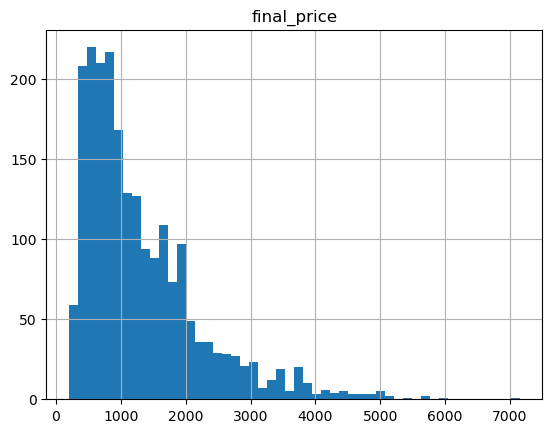

In [6]:
df.hist('final_price', bins=50)

## Question 1
There's one column with missing values. What is it?

#### screen

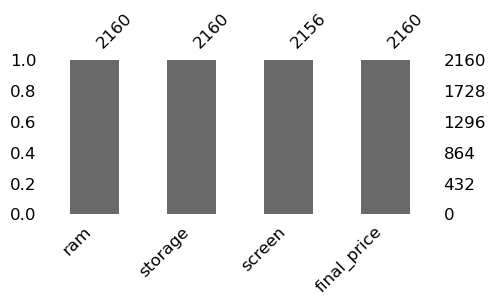

In [7]:
missingno.bar(df, figsize=(5,2), fontsize=12);

## Question 2
What's the median (50% percentile) for variable 'ram'?

In [8]:
df['ram'].median()

np.float64(16.0)

<div class="alert alert-block alert-info">
<h4>Processing</h4> 

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
</div>

In [9]:
np.random.seed(42)

In [10]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

<div class="alert alert-block alert-info">

We need to deal with missing values for the column from Q1.\
We have two options: fill it with 0 or with the mean of this variable.\
Try both options. For each, train a linear regression model without regularization using the code from the lessons.\
For computing the mean, use the training only!\
Use the validation dataset to evaluate the models and compare the RMSE of each option.\

Round the RMSE scores to 2 decimal digits using round(score, 2)
                                   
</div>

Make two copies

In [11]:
option1 = df_shuffled.copy().fillna(0)
# option1.loc[option1['screen'].isna()]  # confirm there are no missing numbers

option1_df_train = option1.iloc[:n_train].copy()
option1_df_val = option1.iloc[n_train:n_train+n_val].copy()
option1_df_test = option1.iloc[n_train+n_val:].copy()

In [12]:
option2 = df_shuffled.copy().fillna(df['screen'].median())

# option1.loc[option1['screen'].isna()]  # confirm there are no missing numbers

option2_df_train = option2.iloc[:n_train].copy()
option2_df_val = option2.iloc[n_train:n_train+n_val].copy()
option2_df_test = option2.iloc[n_train+n_val:].copy()

In [13]:
option1.compare(option2)

screen      
       self other
1430    0.0  15.6
1503    0.0  15.6
624     0.0  15.6
1548    0.0  15.6

Functions

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [15]:
def prepare_X(df):
    X = df.values
    return X

In [16]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [17]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [18]:
# 3a - option1 the one with NaNs filled with 0s

In [19]:
y_train_orig = option1_df_train.final_price
y_val_orig = option1_df_val.final_price
y_test_orig = option1_df_test.final_price

y_train = np.log1p(option1_df_train.final_price)
y_val = np.log1p(option1_df_val.final_price)
y_test = np.log1p(option1_df_test.final_price)

In [20]:
X_train = prepare_X(option1_df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [21]:
y_pred = w_0 + X_train.dot(w)

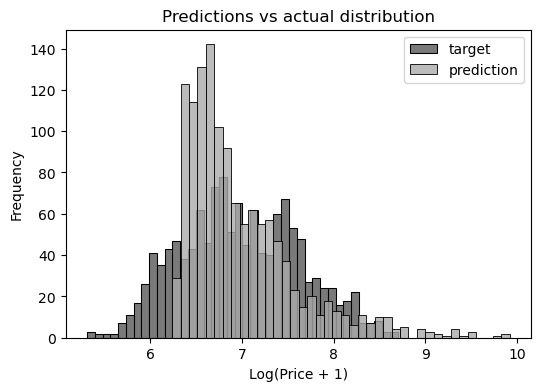

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [23]:
rmse(y_train, y_pred)

np.float64(0.2391256423541011)

In [24]:
# 3b fill with mean

In [25]:
y_train_orig = option2_df_train.final_price
y_val_orig = option2_df_val.final_price
y_test_orig = option2_df_test.final_price

y_train = np.log1p(option2_df_train.final_price)
y_val = np.log1p(option2_df_val.final_price)
y_test = np.log1p(option2_df_test.final_price)

In [26]:
X_train = prepare_X(option2_df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [27]:
y_pred = w_0 + X_train.dot(w)

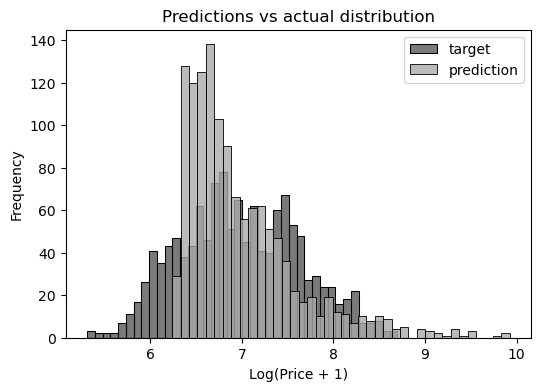

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')


plt.show()

In [29]:
rmse(y_train, y_pred)

np.float64(0.2390873566592709)

## Question 3

    Which option gives better RMSE?

In [ ]:
It should be the median one but it really seems like they are identical which I find suspicious

##  Task
    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to M2 decimal digits.
    Which r gives the best RMSE?


In [30]:
## Question 4

<div class="alert alert-block alert-info">
    
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.\
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].\
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.\
    Fill the missing values with 0 and train a model without regularization.\
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.\
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.\
    Round the result to 3 decimal digits (round(std, 3
<div>


In [31]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Question 5

## Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?
